# Detection of Fake News Project

#### Data dictionary
![alt text](https://drive.google.com/uc?id=1QOaEEscX52abv72ngHEz_q5zjVCF3zuS)

---
#### Objectives

The main objective of the project is to develop a machine learning model capable of accurately identifying fake news.

The secondary objectives will be:
1. Data analysis
  
    a) Is fake news more common in certain categories?
  
    b) Are there topics more commonly associated with fake news?
  
    c) Do fake news headlines follow recurring patterns?

2. Training model

    a) Which combination of NLP and machine learning techniques leads to the best model?

3. Model evaluation
    
    a) What types of performance metrics should be used to evaluate the model's efficiency?

4. Exporting the model to pickle
---
#### Index
```
Library

0. Upload datasets

1. Exploratory data analysis (EDA)
  
    1.1 Is fake news more common in certain categories?
  
    1.2 Are there topics more commonly associated with fake news?
  
    1.3 Do fake news headlines follow recurring patterns?

2. Train and evaluate model
    
    2.1 Data preprocessing

    2.2 Logistic regression model

    2.3 Multilayer Perceptron (MLP)

3. Export model to pickle format

Conclusion
```

### Library

In [113]:
!pip install gensim

In [114]:
## General library
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
#import matplotlib.cm as cm
from collections import Counter
import seaborn as sbn
import pickle
import spacy
from scipy.sparse import hstack

## Machine learning (ML)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss,classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier


## Natural language processing (NLP)
import nltk
from nltk import ngrams
import gensim
from gensim.utils import simple_preprocess
from wordcloud import WordCloud
nlp = spacy.load("en_core_web_sm", disable=["parser", "pos"])

## Stopwwords
from nltk.corpus import stopwords
nltk.download("stopwords")
eng_stop=stopwords.words("english")
eng_stop=set(eng_stop)
eng_stop.update(["featured","image","images","via","twitter","com","pic","https","co","year","old","st","century"])

## Setting
plt.style.use("ggplot")
col=sbn.color_palette("hls", 12) # barchart with categories
col2=sbn.color_palette("rocket",12) # barchart with different intensity
fontit = {'family':'serif','color':'black','size':13} # font of title
fontlab = {'family':'serif','color':'black','size':11} # font of axis labels
fontick = {"family": "cmr10",'color':'black','size':10} # font of ticks text

### Save plot
import os
folder = "plots"
os.makedirs(folder, exist_ok=True)
def save(name):
    plt.savefig(f"{folder}/{name}.png", dpi=300, bbox_inches="tight")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 0. Upload datasets


In [115]:
## Datasets
fake=pd.read_csv(r"https://gitlab.com/PatNzo/nlp_final_proj/-/raw/main/Fake.csv")
true=pd.read_csv(r"https://gitlab.com/PatNzo/nlp_final_proj/-/raw/main/True.csv")

### 1. Exploratory data analysis (EDA)

In [116]:
## Datasets
display(fake.head(10))
display(true.head(10))

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [117]:
## What are the types of topics and frequencies of news reports in the true dataset?
true["subject"].value_counts()

,count
subject,
politicsNews,11272
worldnews,10145


In [118]:
## What are the types of topics and frequencies of news reports in the false dataset?
fake["subject"].value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


In [119]:
## Are there any null values in the two data sets?

fake.info() # no missing values
true.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [120]:
fake["date"]

,date
0,"December 31, 2017"
1,"December 31, 2017"
2,"December 30, 2017"
3,"December 29, 2017"
4,"December 25, 2017"
...,...
23476,"January 16, 2016"
23477,"January 16, 2016"
23478,"January 15, 2016"
23479,"January 14, 2016"


In [121]:
## What is the time period covered by the two datasets?

## Function to convert strings to dates and filter invalid date formats
def to_format_date(date_string):

    invalid_date=[]

    formats = [
        "%B %d, %Y",   # January 12, 2023
        "%B %d, %Y ",  # January 12, 2023
        "%d/%m/%Y",    # 12/01/2023
        "%Y-%m-%d",    # 2023-01-12
        "%d-%m-%Y",    # 12-01-2023
        "%m/%d/%Y",    # 01/12/2023
        "%d-%b-%y",    # 19-Feb-18
        "%b %d, %Y"    # Dec 31, 2017
    ]

    for fmt in formats:
        try:
            return datetime.strptime(date_string, fmt).date()
        except ValueError:
            continue

    # The date does not match any of the formats provided
    invalid_date.append(date_string)
    print(f"Invalid_date{invalid_date}")
    return None




In [122]:
## What is the time period covered by the two data sets?

# Fake
fake["date"]=fake["date"].apply(to_format_date)
fake = fake.dropna(subset=["date"])
print(f"\n FAKE dataset period of time from {fake["date"].min()} to {fake["date"].max()}")

# True
true["date"]=true["date"].apply(to_format_date)
true = true.dropna(subset=["date"])
print(f"\n TRUE dataset period of time from {true["date"].min()} to {true["date"].max()}")

Invalid_date['https://100percentfedup.com/served-roy-moore-vietnamletter-veteran-sets-record-straight-honorable-decent-respectable-patriotic-commander-soldier/']
Invalid_date['https://100percentfedup.com/video-hillary-asked-about-trump-i-just-want-to-eat-some-pie/']
Invalid_date['https://100percentfedup.com/12-yr-old-black-conservative-whose-video-to-obama-went-viral-do-you-really-love-america-receives-death-threats-from-left/']
Invalid_date['https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg']
Invalid_date['https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg']
Invalid_date['https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg']
Invalid_date['https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg']
Invalid_date['MSNBC HOST Rudely Assumes Steel Worker Would Never Let His Son Follow in His Footsteps…He Couldn’t Be More Wrong [Video]']
Invalid_date['https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreeta

#### 1.1 Is fake news more common in certain categories?

In [123]:
#1 Which category is most affected by fake news?

## Obtain frequency for each categories
sub=fake["subject"].value_counts().reset_index()

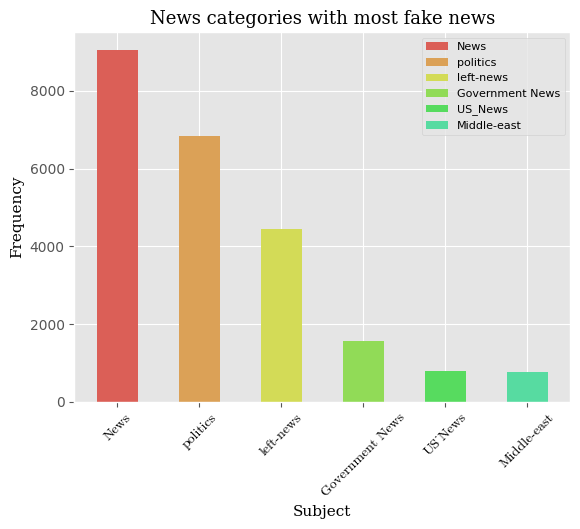

In [124]:
# Represents the frequencies of each category

## Barplot
fig,ax=plt.subplots()
plt.bar(x=sub["subject"],height=sub["count"],label=sub["subject"],width=0.5,color=col)
plt.xlabel("Subject",fontdict=fontlab)
plt.ylabel("Frequency",fontdict=fontlab)
ax.set_xticks(range(len(sub["subject"])),
              labels=(sub["subject"]),
              rotation=45,
              fontdict=fontick)
plt.legend(fontsize=8)
plt.title("News categories with most fake news",fontdict=fontit)
save("MostFakeCategories")
plt.show()

##### **Note on news categories with the most fake news**

As the bar chart shows, the category with the highest number of fake news is *News*, followed by *Politics* and *Left-news*.

#### 1.2 Are there topics more commonly associated with fake news?

##### N-gram solution

In [125]:
#### Data preprocessing

## Define functions to use

## 1) Create n-gram function

def my_ngram(sentence,n):
  n_gram=ngrams(sentence,n)
  return [" ".join(ngr) for ngr in n_gram]


## 2) Clean text
def preprocess_text(text):

    tokens = simple_preprocess(text, deacc=True)

    tokens = [w for w in tokens if w not in eng_stop]
    return tokens


In [126]:
### Apply functions

## Join the title and text to obtain a single text from which to extract the bigrams.
text_toclean=fake["title"]+fake["text"]

## Clean and remove stopwords
text_togram=text_toclean.apply(preprocess_text)

In [127]:
### Apply n-gram procedure
data_bigram=[my_ngram(sentence,2) for sentence in text_togram]

In [128]:
## Convert into flat dataset (list with separated bigrams in this case) so that all bigrams are separated from each other
flat_bigram=[bigram for doc in data_bigram for bigram in doc]

In [129]:
## Flat data
flat_bigram[0:5]

['donald trump',
 'trump sends',
 'sends embarrassing',
 'embarrassing new',
 'new eve']

In [130]:
## Count frequencies for each bigram
list_bigram=Counter(flat_bigram)
dicti=dict(Counter(flat_bigram).most_common(10))

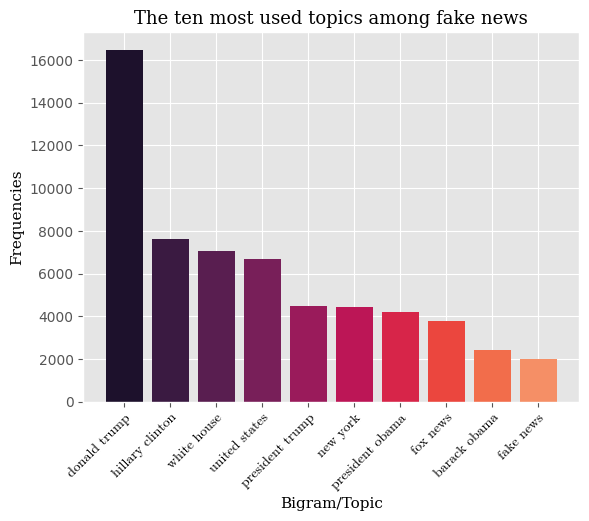

In [131]:
## Make bar chart with the ten most used bigram (topic)

## Barchart
fig,ax=plt.subplots()
ax.bar(x=dicti.keys(),height=dicti.values(),label=dicti.keys(),color=col2)
ax.set_title("The ten most used topics among fake news",fontdict=fontit)
ax.set_ylabel("Frequencies",fontdict=fontlab)
ax.set_xlabel("Bigram/Topic",fontdict=fontlab)
ax.set_xticks(range(len(dicti)),
              labels=dicti.keys(),
              fontdict=fontick,
              rotation=45,
              rotation_mode="anchor",
              ha="right")
save("MostUsedTopics")
plt.show()


##### WordcCloud solution

In [132]:
## Create a word cloud image with bigrams in order to compare the bar chart with a more ‘visual’ method such as a word cloud
wc=WordCloud().generate_from_frequencies(list_bigram)

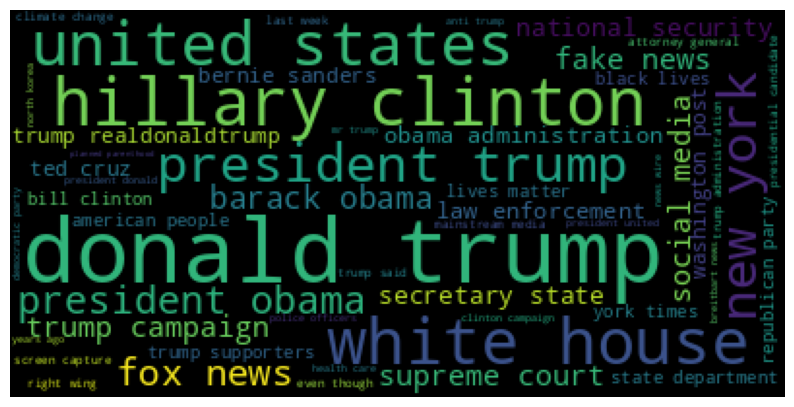

In [133]:
## Show word cloud image
plt.figure(figsize=(10,6))
plt.imshow(wc)
plt.axis("off")
save("WordCloud")
plt.show()

##### **Notes on the most frequent topics of fake news**

The bar chart and word cloud show that the topic ‘Donald Trump’ is the most frequent in fake news, followed by ‘Hillary Clinton,’ ‘White House,’ and ‘United States.’

#### 1.3 Do fake news headlines follow recurring patterns?

In [134]:
## Create a list/series with only the news headlines
only_title=fake["title"]

##### N-Gram solution

In [135]:
## N-gram solution

### Clean text title (e.g. special symbol or characters, stopwords and punctuation)
title_togram=only_title.apply(preprocess_text)

In [136]:
## Ngram title

### Apply n-gram
title_bigram=[my_ngram(sentence,2) for sentence in title_togram]

### Get flat title_bigram
title_bi_flat=[bigram for doc in title_bigram for bigram in doc]
count=dict(Counter(title_bi_flat).most_common(10))

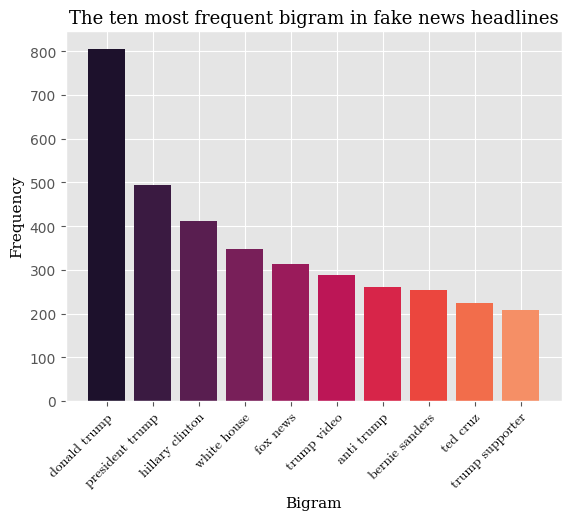

In [137]:
#### Plot bigram title
fig,ax=plt.subplots()
plt.bar(x=count.keys(),height=count.values(),label=count.keys(),color=col2)
plt.xlabel("Bigram",fontdict=fontlab)
plt.ylabel("Frequency",fontdict=fontlab)
ax.set_xticks(range(len(count.keys())),
             labels=count.keys(),
             fontdict=fontick,
             rotation=45,
             rotation_mode="anchor",
             ha="right")
#plt.legend(fontsize=8,ncol=2)
plt.title("The ten most frequent bigram in fake news headlines",fontdict=fontit)
save("MostFrequentBi")
plt.show()




##### NER solution

In [138]:
## Use the NER procedure to identify entity patterns in news headlines

# Create doc with preprocessing
clean_title = [" ".join(preprocess_text(title)) for title in only_title]
docs = list(nlp.pipe(clean_title))


In [139]:
# See token and NER entities
freq = list([[token, token.ent_type_] for doc in docs for token in doc if token.ent_type_ != "" and token.ent_type_ != "WORK_OF_ART" ]) # "Space" filter = unrecognized entities and "Work_of_art" filter = wrong entities


In [140]:
#### What are the ten most entitities used in fake news?
# Flatten the list of lists
flat_freq = [item for sublist in freq for item in sublist]
cnt_ner=dict(Counter(flat_freq).most_common(10))

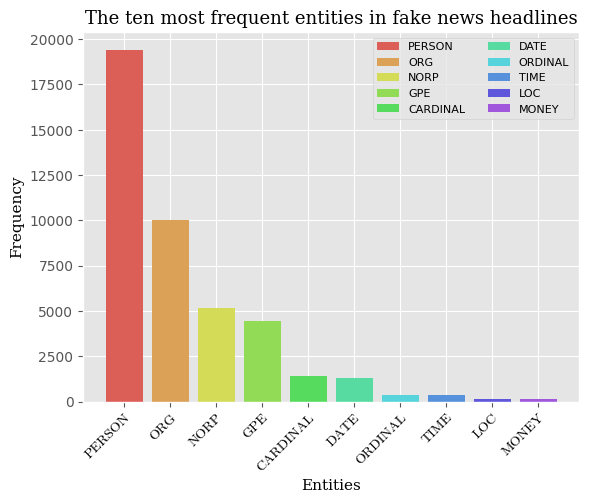

In [141]:
#### Plot top ten entities

## Barchart
fig,ax=plt.subplots()
plt.bar(cnt_ner.keys(),cnt_ner.values(),label=cnt_ner.keys(),color=col)
plt.xlabel("Entities",fontdict=fontlab)
plt.ylabel("Frequency",fontdict=fontlab)
ax.set_xticks(ticks=range(len(cnt_ner.keys())),
              labels=cnt_ner.keys(),
              fontdict=fontick,
              rotation=45,
              rotation_mode="anchor",
              ha="right")
plt.legend(fontsize=8,ncol=2)
plt.title("The ten most frequent entities in fake news headlines",fontdict=fontit)
save("NER_MostHead")
plt.show()

##### **Note on recurring patterns in fake news headlines**

- Barchart shows that recurring bigrams in fake news headlines are associated with the names of political figures, particularly Donald Trump, his enemies and his supporters

- NER entity results confirm a recurring pattern based on the use of person names, organisations, national origins and countries in fake news associated with Donald Trump

### 2. Train Model

*I trained two models, Logistic Regression and MLP (Multilayer Perceptron), because I wanted to see if there were any differences in performance between them.*

###### 2.1 Data preprocessing

In [142]:
## Before merging two datasets, I add labels to each data set to distinguish fake news from real news.
fake.insert(4,"label",0)
true.insert(4,"label",1)

In [143]:
## Concatenating two datasets
df=pd.concat(objs=[fake,true],axis=0)

In [144]:
## Type of subjects
true["subject"].value_counts()


,count
subject,
politicsNews,11272
worldnews,10145


In [145]:
## Type of subjects
fake["subject"].value_counts()


,count
subject,
News,9050
politics,6836
left-news,4456
Government News,1568
US_News,783
Middle-east,778


In [146]:
## Subject column encoding
## Since two data sets have different news categories but with the same topic, I decided to change the name of a category.
## In this case, politics and political news could contain the same information.
## The goal is to code the object column to add it to the feature variable.

df["subject"]=df["subject"].where(df["subject"]!="politicsNews",other="politics")



In [147]:
df["subject"].value_counts()

,count
subject,
politics,18108
worldnews,10145
News,9050
left-news,4456
Government News,1568
US_News,783
Middle-east,778


In [148]:
## Run OneHotEncoding function in order to obtain a number of columns equal to number of categories
## in subject column

df=pd.get_dummies(df,prefix="",prefix_sep="",columns=['subject'])

In [149]:
## Check if there are "space" between news subject name
[col for col in df.columns if " " in col]

['Government News']

In [150]:
## Add an underscore between the names of the news categories and remove the spaces before and after the text.
df.columns=df.columns.str.replace(" ","_")
df.columns=df.columns.str.replace("-","_")
df.columns=df.columns.str.strip(" ")

In [151]:
### Dataset after OneHotEncoding and cleaning procedures
df

,title,text,date,label,Government_News,Middle_east,News,US_News,left_news,politics,worldnews
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,2017-12-31,0,False,False,True,False,False,False,False
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,2017-12-31,0,False,False,True,False,False,False,False
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",2017-12-30,0,False,False,True,False,False,False,False
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",2017-12-29,0,False,False,True,False,False,False,False
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,2017-12-25,0,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,2017-08-22,1,False,False,False,False,False,False,True
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",2017-08-22,1,False,False,False,False,False,False,True
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,2017-08-22,1,False,False,False,False,False,False,True
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,2017-08-22,1,False,False,False,False,False,False,True


In [152]:
# Prepare the features and label to be used in the model

## Split features and target
x=pd.concat([df["title"],df["text"],df.iloc[:,4:11]],axis=1) ## I used df.iloc[:,4:11] to obtain only the features of the model (news category names)
y=df["label"]

## Split in train and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.3,
                                               shuffle=True,
                                               stratify=y)

In [153]:
## Check if two classes are balanced

### Test
Counter(y_test)


Counter({1: 6425, 0: 7042})

In [154]:
### Train
Counter(y_train)

Counter({1: 14992, 0: 16429})

In [155]:
# Cleaning train and test sets
## Clean both datasets
col_toclean=["title","text"]
x_traincp=x_train.copy()
x_testcp=x_test.copy()

## Run the ‘preprocess_text’ function to clean the training and test sets.
for c in col_toclean:
  x_traincp[c]=x_train[c].apply(preprocess_text)
  x_testcp[c]=x_test[c].apply(preprocess_text)

In [156]:
# Tokenization
## Join tokens for each title and for each text

## Train
x_traincp["title"] = x_traincp["title"].apply(lambda tokens: " ".join(tokens))
x_traincp["text"] = x_traincp["text"].apply(lambda tokens: " ".join(tokens))

## Test
x_testcp["title"] = x_testcp["title"].apply(lambda tokens: " ".join(tokens))
x_testcp["text"] = x_testcp["text"].apply(lambda tokens: " ".join(tokens))



In [157]:
# Vectorization
## Run TfidfVectorizer procedure

# Title
tfidf_title=TfidfVectorizer()
x_train_title=tfidf_title.fit_transform(x_traincp["title"])
x_test_title=tfidf_title.transform(x_testcp["title"])

# Text
tfidf_text=TfidfVectorizer()
x_train_text=tfidf_text.fit_transform(x_traincp["text"])
x_test_text=tfidf_text.transform(x_testcp["text"])


In [158]:
## Create matrix with all features
## Boolean features
bool_train_feat=x_traincp.drop(["title","text"],axis=1).astype(int).values
bool_test_feat=x_testcp.drop(["title","text"],axis=1).astype(int).values

## Merge all the feautures
train_fin=hstack([x_train_title,x_train_text,bool_train_feat])
test_fin=hstack([x_test_title,x_test_text,bool_test_feat])

###### 2.2 Logistic Regression model

In [159]:
## Initialize Logistic Regression
lr=LogisticRegression()

In [160]:
## Run logistic regression
lr.fit(train_fin,y_train)

LogisticRegression()

In [161]:
## Evaluate model
### Log loss method

### Get probabilities
y_prob_train=lr.predict_proba(train_fin)
y_prob_test=lr.predict_proba(test_fin)

### Log loss results
print(log_loss(y_train,y_prob_train))
print(log_loss(y_test,y_prob_test))

0.03317094306403689
0.04162402115727822


In [162]:
## Evaluate model
### Confusion matrix method

### Prediction
y_pred_train=lr.predict(train_fin)
y_pred_test=lr.predict(test_fin)

### Confusion matrix
cm_train=confusion_matrix(y_train,y_pred_train)
cm_test=confusion_matrix(y_test,y_pred_test)

In [163]:
def show_confusion(y_true,y_pred):
    ### Confusion matrix
    cm=confusion_matrix(y_true,y_pred)
    df_cm=pd.DataFrame(cm,index=["0:Fake","1:True"],columns=["Predict Fake","Predict True"])
    sbn.heatmap(df_cm,annot=True,fmt=".0f",cmap="Oranges",)

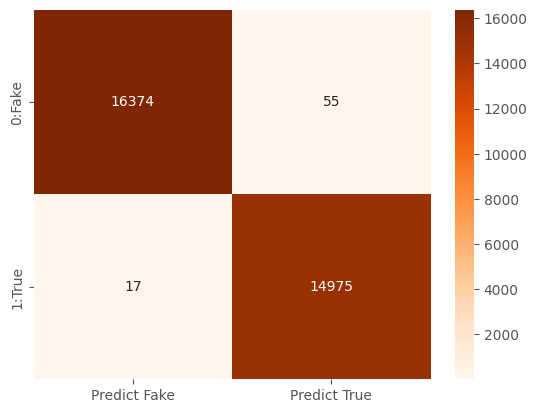

In [164]:
### Confusion matrix - TRAIN
show_confusion(y_train,y_pred_train)

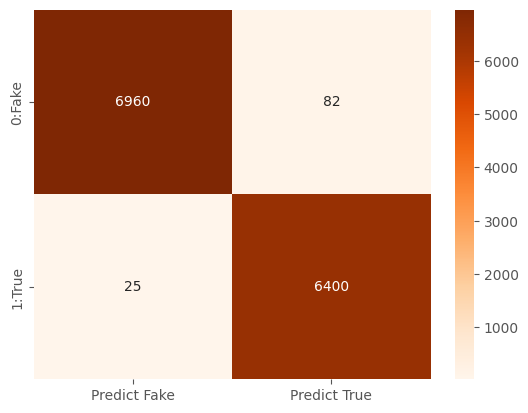

In [165]:
### Confusion matrix - TEST
show_confusion(y_test,y_pred_test)


In [166]:
### Show all the metrics for train model evaluation
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16429
           1       1.00      1.00      1.00     14992

    accuracy                           1.00     31421
   macro avg       1.00      1.00      1.00     31421
weighted avg       1.00      1.00      1.00     31421



In [167]:
### Show all the metrics for test model evaluation
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7042
           1       0.99      1.00      0.99      6425

    accuracy                           0.99     13467
   macro avg       0.99      0.99      0.99     13467
weighted avg       0.99      0.99      0.99     13467



##### 2.3 Multilayer Perceptron (MLP)

In [168]:
### MLP Classifier

mlp=MLPClassifier(activation="logistic",
                  solver="adam",
                  max_iter=100,
                  hidden_layer_sizes=(100,),
                  tol=0.005,
                  verbose=True)

In [169]:
mlp.fit(train_fin,y_train)

Iteration 1, loss = 0.43950712
Iteration 2, loss = 0.12093528
Iteration 3, loss = 0.05747536
Iteration 4, loss = 0.03556673
Iteration 5, loss = 0.02485320
Iteration 6, loss = 0.01886450
Iteration 7, loss = 0.01517457
Iteration 8, loss = 0.01280414
Iteration 9, loss = 0.01115647
Iteration 10, loss = 0.00997803
Iteration 11, loss = 0.00907949
Iteration 12, loss = 0.00836888
Iteration 13, loss = 0.00778677
Iteration 14, loss = 0.00728773
Iteration 15, loss = 0.00685553
Iteration 16, loss = 0.00647346
Iteration 17, loss = 0.00613088
Training loss did not improve more than tol=0.005000 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', max_iter=100, tol=0.005, verbose=True)

In [170]:
## Evaluate model
mlp.score(test_fin,y_test)

0.9949506200341576

In [171]:
## Get metrics in order to evaluate model
ytrain_pred_mlp=mlp.predict(train_fin)
ytest_pred_mlp=mlp.predict(test_fin)

In [172]:
## Metrics

### Train
print(classification_report(y_train,ytrain_pred_mlp))

### Test
print(classification_report(y_test,ytest_pred_mlp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16429
           1       1.00      1.00      1.00     14992

    accuracy                           1.00     31421
   macro avg       1.00      1.00      1.00     31421
weighted avg       1.00      1.00      1.00     31421

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7042
           1       0.99      1.00      0.99      6425

    accuracy                           0.99     13467
   macro avg       0.99      1.00      0.99     13467
weighted avg       0.99      0.99      0.99     13467



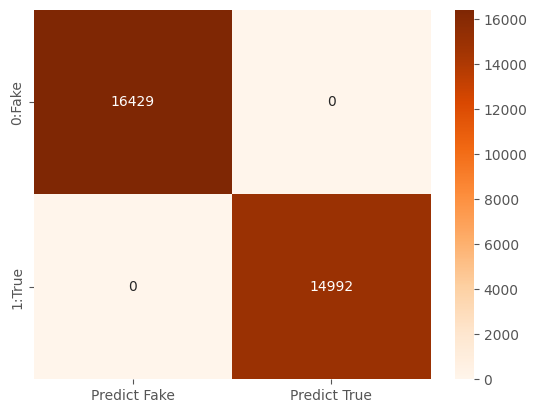

In [173]:
## Confusion matrix - TRAIN
show_confusion(y_train,ytrain_pred_mlp)

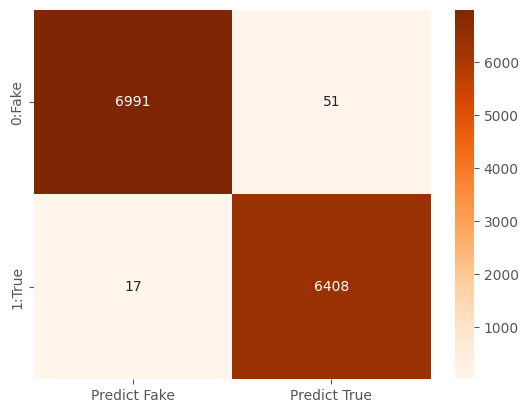

In [174]:
## Confusion matrix - TEST
show_confusion(y_test,ytest_pred_mlp)


In [175]:
def show_confusion_comparison(y_true,y_pred,ax):
    ### Confusion matrix
    cm=confusion_matrix(y_true,y_pred)
    df_cm=pd.DataFrame(cm,index=["0:Fake","1:True"],columns=["Predict Fake","Predict True"])
    sbn.heatmap(df_cm,annot=True,fmt=".0f",cmap="Oranges",ax=ax)

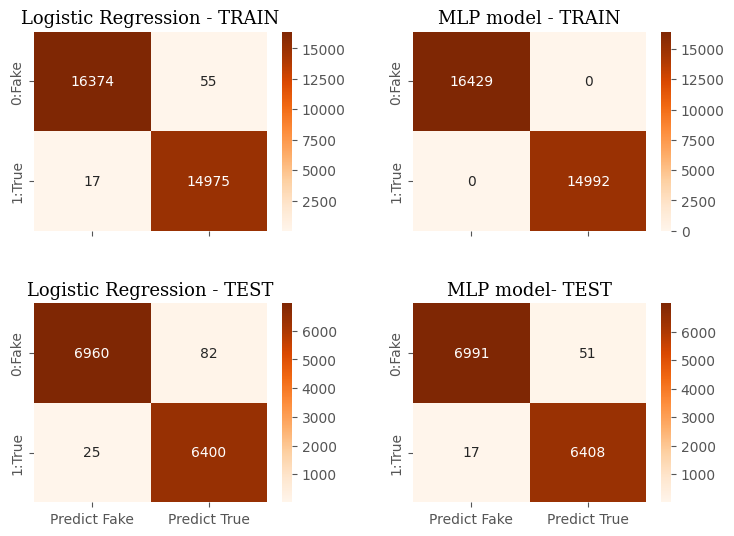

In [176]:
fig,axes=plt.subplots(2,2,figsize=(8,6),sharex=True)

# Train - Logistic regression model
axes[0,0].set_title("Logistic Regression - TRAIN",fontdict=fontit)
show_confusion_comparison(y_train,y_pred_train,axes[0,0]) ### Logistic regression - Confusion matrix - TRAIN

# Train - MLP model
axes[0,1].set_title("MLP model - TRAIN",fontdict=fontit)
show_confusion_comparison(y_train,ytrain_pred_mlp,axes[0,1]) ### MLP model - Confusion matrix - TRAIN

# Test - Logistic regression model
axes[1,0].set_title("Logistic Regression - TEST",fontdict=fontit)
show_confusion_comparison(y_test,y_pred_test,axes[1,0]) ### Logistic regression - Confusion matrix - TEST

# Test - MPL model
axes[1,1].set_title("MLP model- TEST",fontdict=fontit)
show_confusion_comparison(y_test,ytest_pred_mlp,axes[1,1]) ### MLP model - Confusion matrix - TEST

plt.tight_layout(pad=3.0)
save("CombinedConfusion")
plt.show()


##### **Note on two models**

The classification reports for the two models (logistic regression and MPL) show similar values in terms of accuracy, recall, and F1 score, but looking at the MPL confusion matrix values, we can see a slightly better performance for the MLP training and testing model (as shown in the graphs above) compared to logistic regression.
For this reason, I decided to use the MLP model as the basis for the fake news plug-in and export it in pickle format for the future steps.


### 3) Export model to pickle format

In [177]:
## The idea of exporting the model in pickle format stems from the theoretical need to implement this model
## in a plug-in for the Chrome browser and thus share it with future professionals who will create the plug-in.

with open ("mlp_fakenews.pkl","wb") as file:
  pickle.dump(mlp, file)

### Conclusion

1. In conclusion, the analysis revealed that:

  - The categories of news with the most fake news concern ‘News’, “Politics” and ‘Left-news’.

  - The topics with the highest number of fake news stories are ‘Donald Trump’, ‘Hilary Clinton’, ‘White House’ and ‘United States’, in line with the period (from 2015 to 2018) in which the news was collected, i.e. pre, during and post US elections.

  - News headlines have recognisable and repetitive patterns that include the use of names of people (PERSON), organisations (ORG) and nationalities/political groups (NORP). In fact, the main elements contained in fake news headlines are “Donald Trump”, “President Trump”, “Hilary Clinton”, “White House” and “Fox News”.


2. Finally, two models (Logistic regression and Multi Perceptron, MLP) were trained and tested with the aim of creating a browser plug-in capable of filtering fake news. The analyses and results showed that the MLP model was better able to predict fake news than the Logistic regression model.

---
**NOTE**: These analyses are for educational purposes only. It is clear that the proposed analyses are too limited on a specific data set that only contains news on certain topics.